<a href="https://colab.research.google.com/github/Audrey-ai/Supervised-and-unsupervised-learning-applicationin-R/blob/main/Part2_Unsupervised_learning_application_to_Russian_brand_using_R_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

###a) Specification of Data Analytical Question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

The **objective** of this research would be to learn the characteristic of customer groups for this brand using unsupervised learning techniques. 

###b) Determining the metric for success

The research will be consindered a success if we are able be to learn the characteristic of customer groups for this brand using unsupervised learning techniques.

###c) Understanding the context

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

###d) Recording the Experimental Design

Experimental design refers to how participants are allocated to the different conditions in a research or experiment. The experimental design used is Independent measures design, also known as between-groups,which is an experimental design where different participants are used in each condition of the independent variable. This means that each condition of the experiment includes a different group of participants.

###e) Data Relevance

The data we have to help us in our research is relevant with a number of variables helping us achieve our set objective of learning the characteristics of customer groups using unsupervised learning techniques.

#2. Reading and checking of data

In [ ]:
#Load the readr library to bring in the dataset
library(readr)

#Reading and checking the data on Kira Plastinina brand
#
Brand <- read.csv("online_shoppers_intention.csv")
head(Brand)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
#Checking the dimensions of the table

dim(Brand)

#There are 12330 rows and 18 columns

[1] 12330    18

In [ ]:
#Displaying the type and a preview of all columns
#

library(dplyr)
glimpse(Brand)

Rows: 12,330
Columns: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2…
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, 0…
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, 2…
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627.…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05000…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14000…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, 0…
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Feb…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1…
$ Browser      

In [ ]:
#Checking on summary statistics of numeric variables

summary(Brand)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

#3. Data Cleaning

In [ ]:
#Checking for missing values in the columns of our dataset
#

colSums(is.na(Brand))

#There are a few records with null values which we will drop

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [ ]:
#Dropping null values
#

Brand <- na.omit(Brand)
dim(Brand)

#The 14 missing values have been ommited

[1] 12316    18

In [ ]:
#Checking for duplicate data
#

duplicated <- Brand[duplicated(Brand),]
duplicated


In [ ]:
#There are duplicates in our data
#Dropping duplicate values
#

Brand %>% distinct()
dim(Brand)

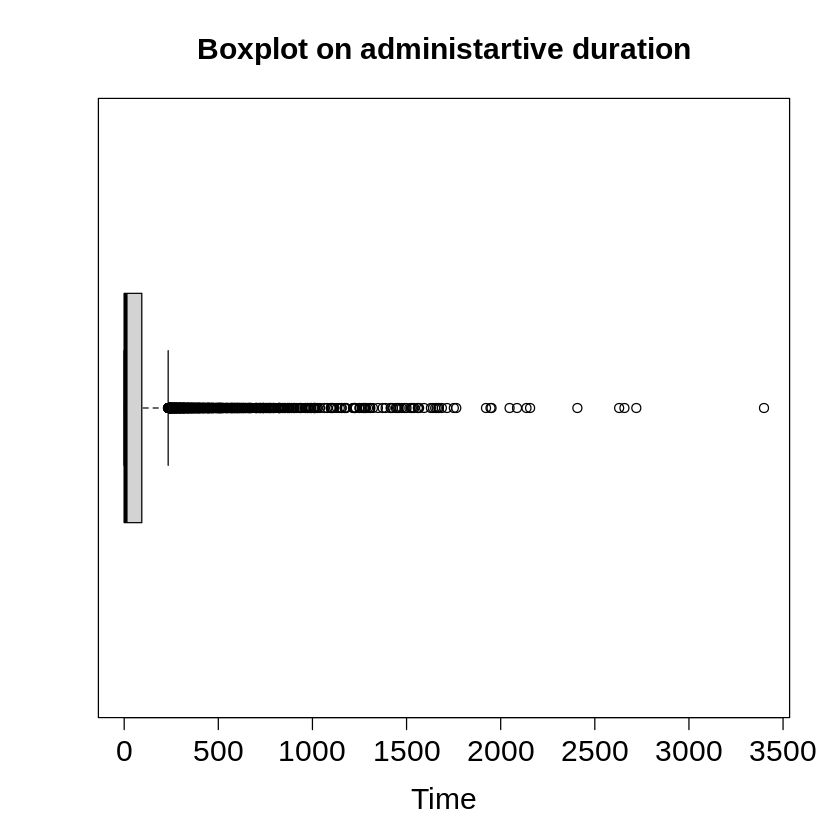

In [ ]:
#Checking for outliers in time spent on site column
#

boxplot(Brand$Administrative_Duration, 
main = "Boxplot on administartive duration",
xlab = "Time",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers

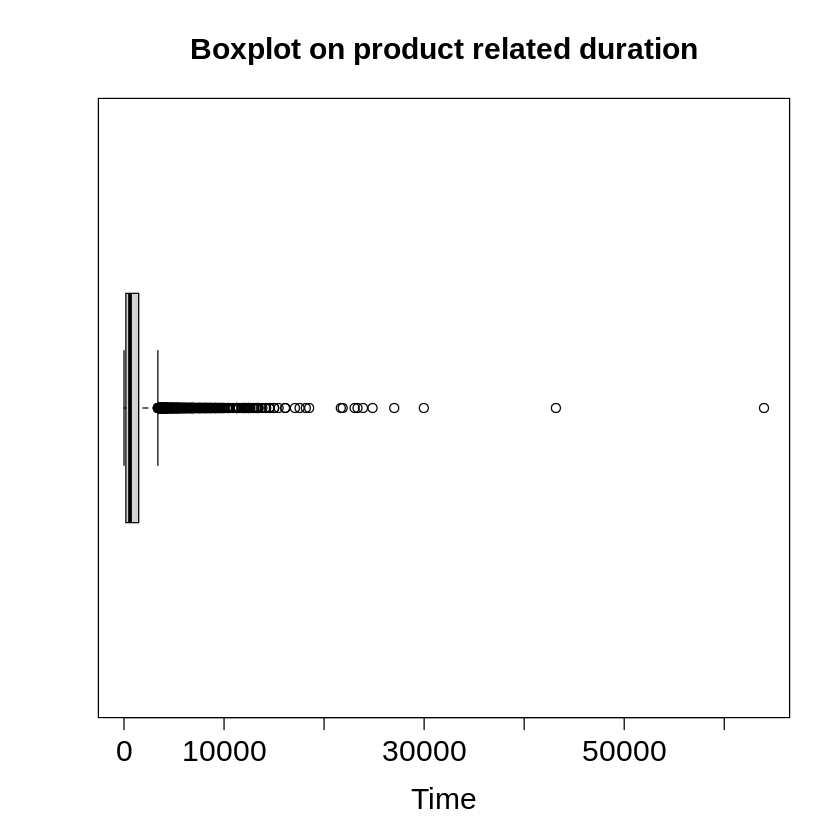

In [ ]:
#Checking for outliers in time spent on site column
#

boxplot(Brand$ProductRelated_Duration, 
main = "Boxplot on product related duration",
xlab = "Time",
horizontal=TRUE,
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)

#There are no outliers

#4. Exploratory Data Analysis

###4.1 Univariate Analysis

In [ ]:
#First checking out the class of each column

cls <- sapply(Brand, class)
cls

#Next selecting Numeric Variables
Numeric_Variables <- Brand %>% select(which(cls != "character"))
head(Numeric_Variables)


#Excluding categorical numerical variables to remain with only continuous variables
Continuous_Variables <- Numeric_Variables[,c(2,4,6,7,8,9)]
head(Continuous_Variables)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3,FALSE,FALSE


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0.000000,0.20000000,0.2000000,0
2,0,0,64.000000,0.00000000,0.1000000,0
3,-1,-1,-1.000000,0.20000000,0.2000000,0
4,0,0,2.666667,0.05000000,0.1400000,0
5,0,0,627.500000,0.02000000,0.0500000,0
6,0,0,154.216667,0.01578947,0.0245614,0


In [ ]:
#Summary Statistics on Continuous Variables
#

summary(Continuous_Variables)

#From the below summary, we can be able to tell the minimum, maximum,median,mean,1st and 3rd quartiles
#and range of selected continuous variables

 Administrative_Duration Informational_Duration ProductRelated_Duration
 Min.   :  -1.00         Min.   :  -1.00        Min.   :   -1.0        
 1st Qu.:   0.00         1st Qu.:   0.00        1st Qu.:  185.0        
 Median :   8.00         Median :   0.00        Median :  599.8        
 Mean   :  80.91         Mean   :  34.51        Mean   : 1196.0        
 3rd Qu.:  93.50         3rd Qu.:   0.00        3rd Qu.: 1466.5        
 Max.   :3398.75         Max.   :2549.38        Max.   :63973.5        
  BounceRates         ExitRates         PageValues     
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.000  
 1st Qu.:0.000000   1st Qu.:0.01429   1st Qu.:  0.000  
 Median :0.003119   Median :0.02512   Median :  0.000  
 Mean   :0.022152   Mean   :0.04300   Mean   :  5.896  
 3rd Qu.:0.016684   3rd Qu.:0.05000   3rd Qu.:  0.000  
 Max.   :0.200000   Max.   :0.20000   Max.   :361.764  

Month
 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1727  184  432  288 1894 3363 2998  549  448 

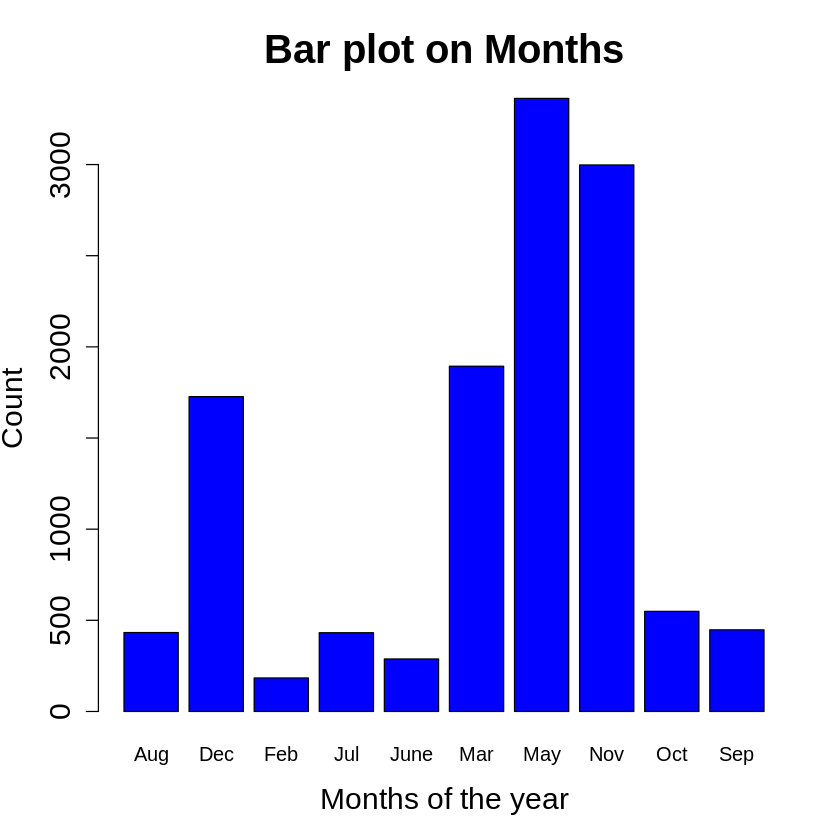

In [ ]:
#Creating bar plot on months of the year
#
#First creating frequency distribution on whether male or not(gender)
#


Month <- Brand$Month
Month_frequency <- table(Month)
Month_frequency

#Creating a bar plot to reflect the same
barplot(Month_frequency,
main = 'Bar plot on Months',
xlab = 'Months of the year',
ylab = 'Count',
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Most time was spent on the site during the months of May and November

Revenue
FALSE  TRUE 
10408  1908 

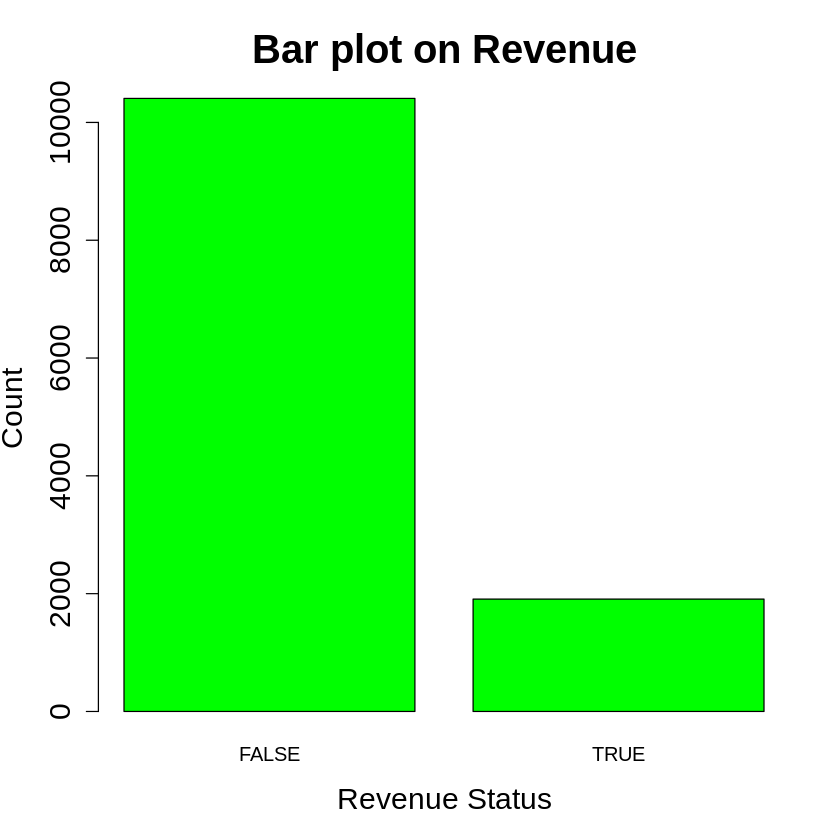

In [ ]:
#Creating bar plot on months of the year
#
#First creating frequency distribution on whether male or not(gender)
#

Revenue <- Brand$Revenue
Revenue_frequency <- table(Revenue)
Revenue_frequency

#Creating a bar plot to reflect the same
barplot(Revenue_frequency,
main = 'Bar plot on Revenue',
xlab = 'Revenue Status',
ylab = 'Count',
col = 'Green',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)


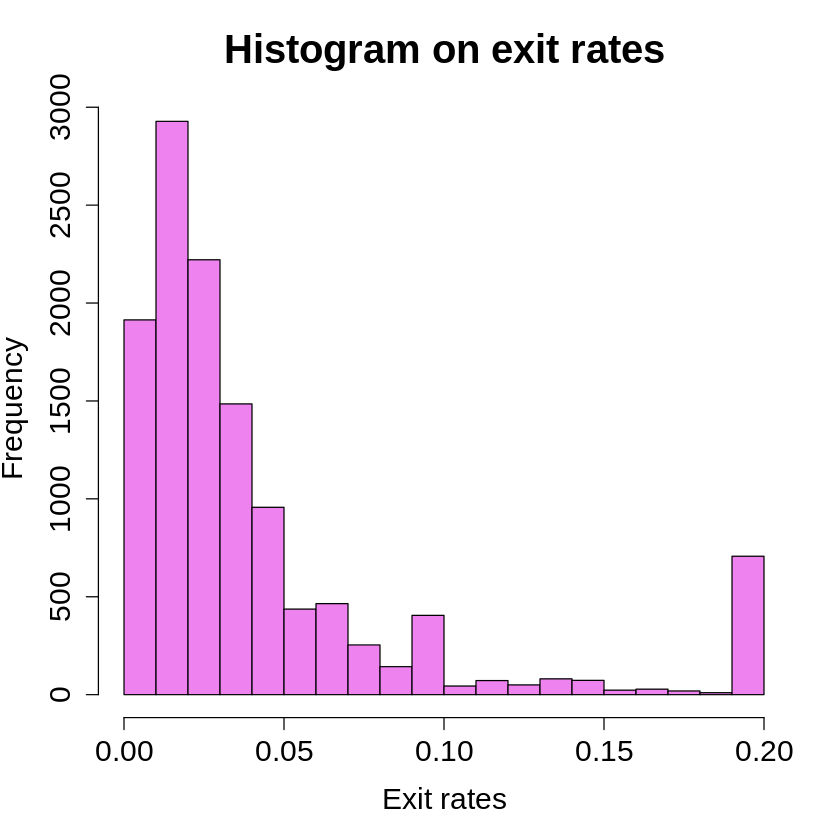

In [ ]:
#Histogram on exit rates

hist(Brand$ExitRates,
main = "Histogram on exit rates",
xlab = "Exit rates",
ylab = 'Frequency',
col = 'Violet',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

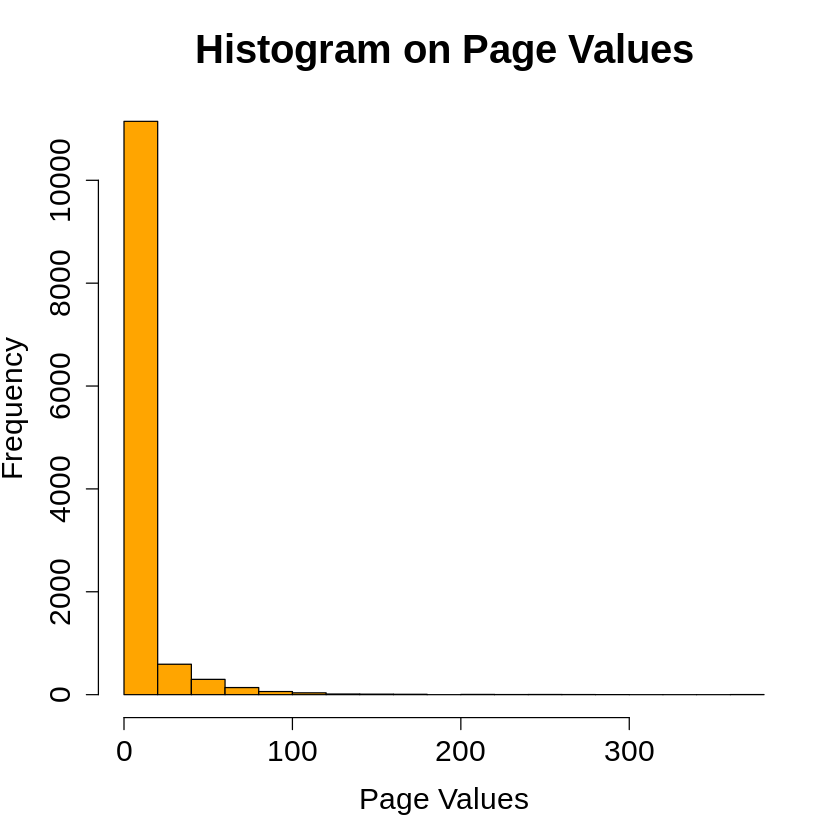

In [ ]:
#Histogram on Page values

hist(Brand$PageValues,
main = "Histogram on Page Values",
xlab = "Page Values",
ylab = 'Frequency',
col = 'Orange',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

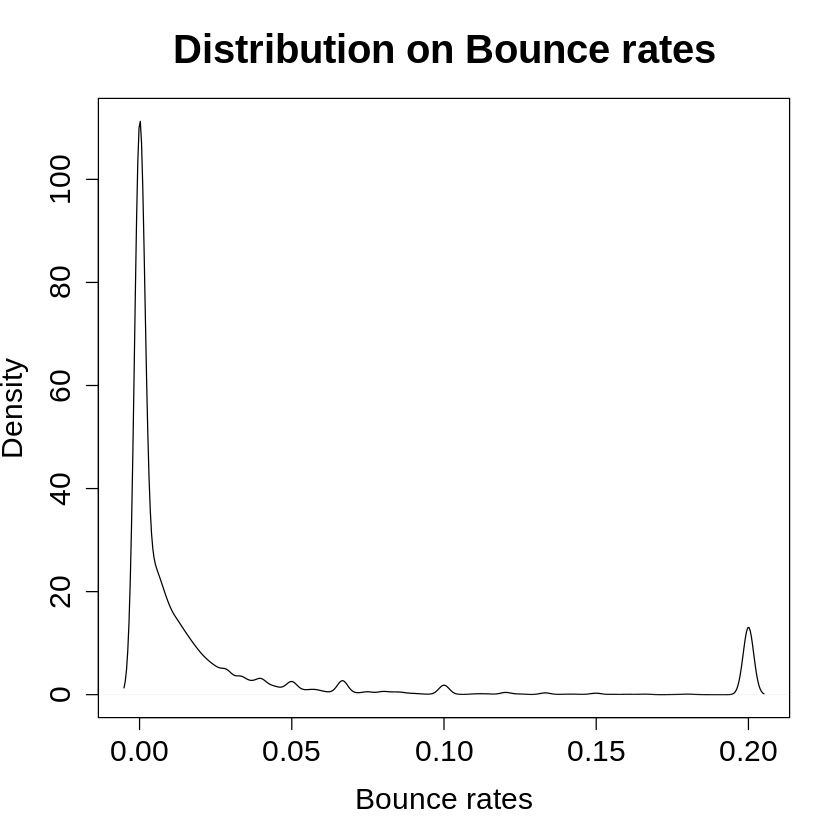

In [ ]:
#Plotting the distribution on administrative duration
#

plot(density(Brand$BounceRates),
main = 'Distribution on Bounce rates',
xlab = 'Bounce rates',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)



###4.2 Bivariate Analysis

In [ ]:
#Obtaining the covariance matrix for our variables

cov(Continuous_Variables)

#We do notice a negative linear relationship between Bounce and exit rates and
#Administrative_Duration,Informational_Duration and	ProductRelated_Duration


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative_Duration,31279.612416,5926.7051209,120275.48030,-1.234436283,-1.764732353,221.6615910
Informational_Duration,5926.705121,19831.8156453,93629.45735,-0.505186348,-0.718955880,80.5459932
ProductRelated_Duration,120275.480302,93629.4573503,3664822.11031,-17.096094015,-23.377628092,1871.5291268
BounceRates,-1.234436,-0.5051863,-17.09609,0.002345187,0.002146610,-0.1073822
ExitRates,-1.764732,-0.7189559,-23.37763,0.002146610,0.002354899,-0.1572253
PageValues,221.661591,80.5459932,1871.52913,-0.107382203,-0.157225332,345.1393266


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative_Duration,1.00000000,0.23795860,0.35523845,-0.1441283,-0.2056184,0.06746252
Informational_Duration,0.23795860,1.00000000,0.34730003,-0.0740767,-0.1052046,0.03078687
ProductRelated_Duration,0.35523845,0.34730003,1.00000000,-0.1844088,-0.2516447,0.05262267
BounceRates,-0.14412830,-0.07407670,-0.18440884,1.0000000,0.9134364,-0.11935658
ExitRates,-0.20561843,-0.10520464,-0.25164475,0.9134364,1.0000000,-0.17439706
PageValues,0.06746252,0.03078687,0.05262267,-0.1193566,-0.1743971,1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



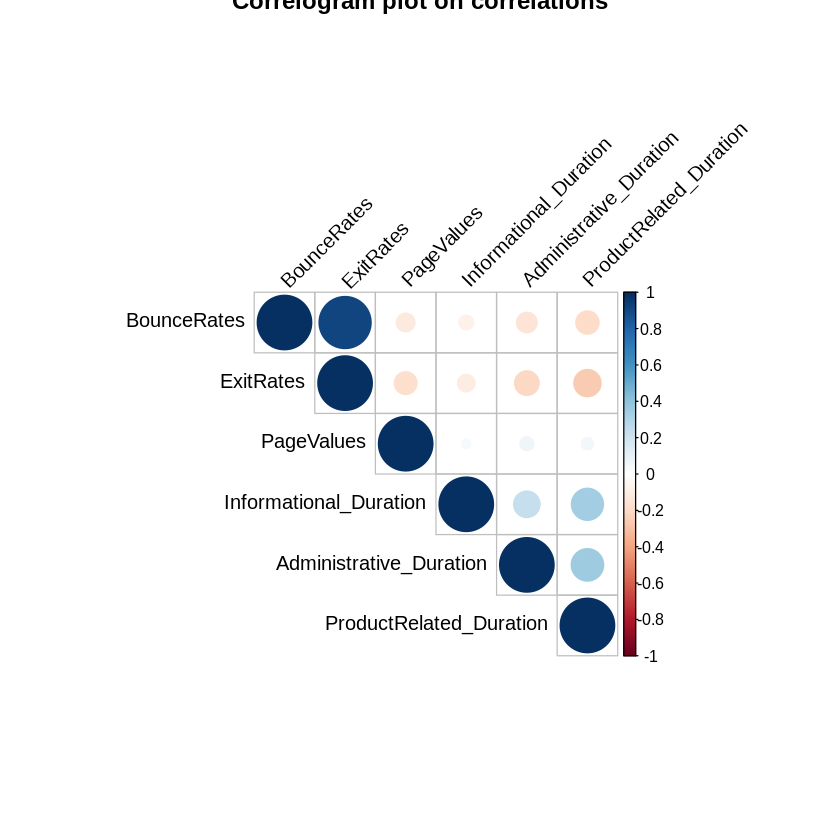

In [ ]:
#Checking on correlation on continous variables
#

#Creating correlation matrix
correlation <- cor(Continuous_Variables)
correlation

#Creating a correlogram
install.packages("corrplot")
library(corrplot)
corrplot(correlation, type = "upper", order = "hclust",main = 'Correlogram plot on correlations', 
         tl.col = "black", tl.srt = 45)


#From the below correlation matrix and correlogram,
#We do notice a negative linear relationship between Bounce and exit rates and
#Administrative_Duration,Informational_Duration and	ProductRelated_Duration

#We also notice a strong positive correlation between bounce and exit rates


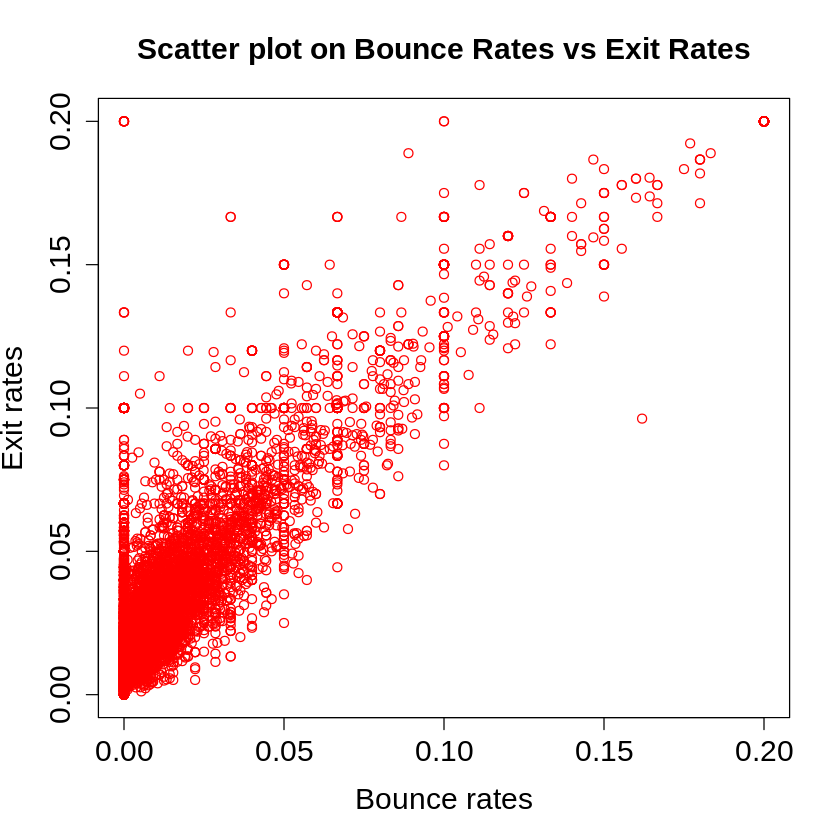

In [ ]:
#Scatter plot on bounce and exit rates

plot(Brand$BounceRates,Brand$ExitRates,
main = 'Scatter plot on Bounce Rates vs Exit Rates', 
xlab="Bounce rates", 
ylab="Exit rates",
col = 'Red',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


#We can notice a positive linear correlation between the two variables

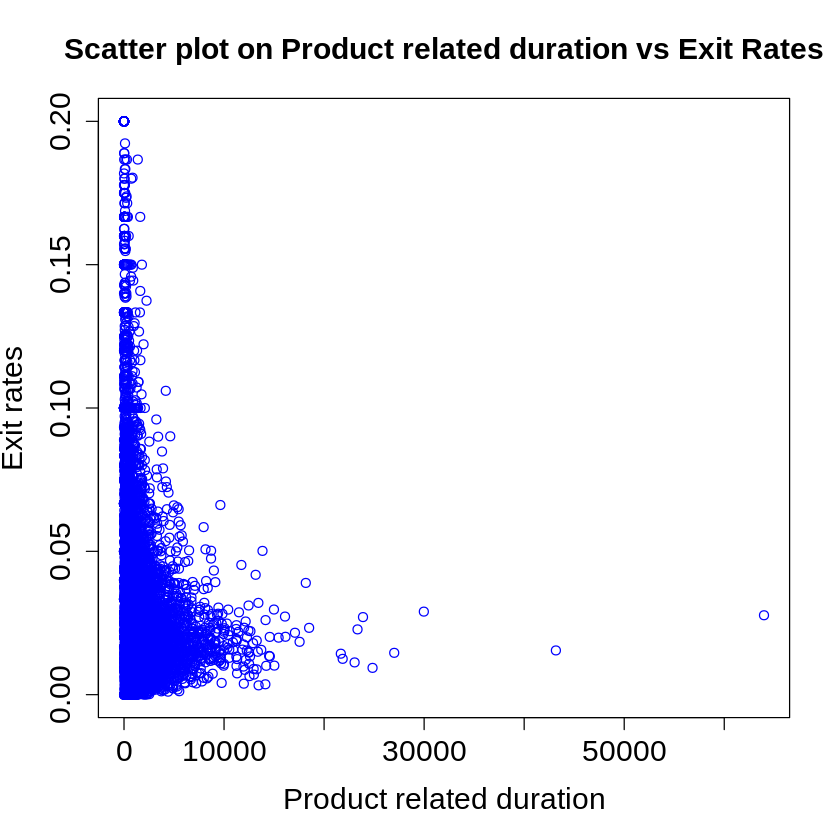

In [ ]:
#Scatter plot on Product related duration and exit rates

plot(Brand$ProductRelated_Duration,Brand$ExitRates,
main = 'Scatter plot on Product related duration vs Exit Rates', 
xlab="Product related duration", 
ylab="Exit rates",
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)


#We can notice a positive linear correlation between the two variables

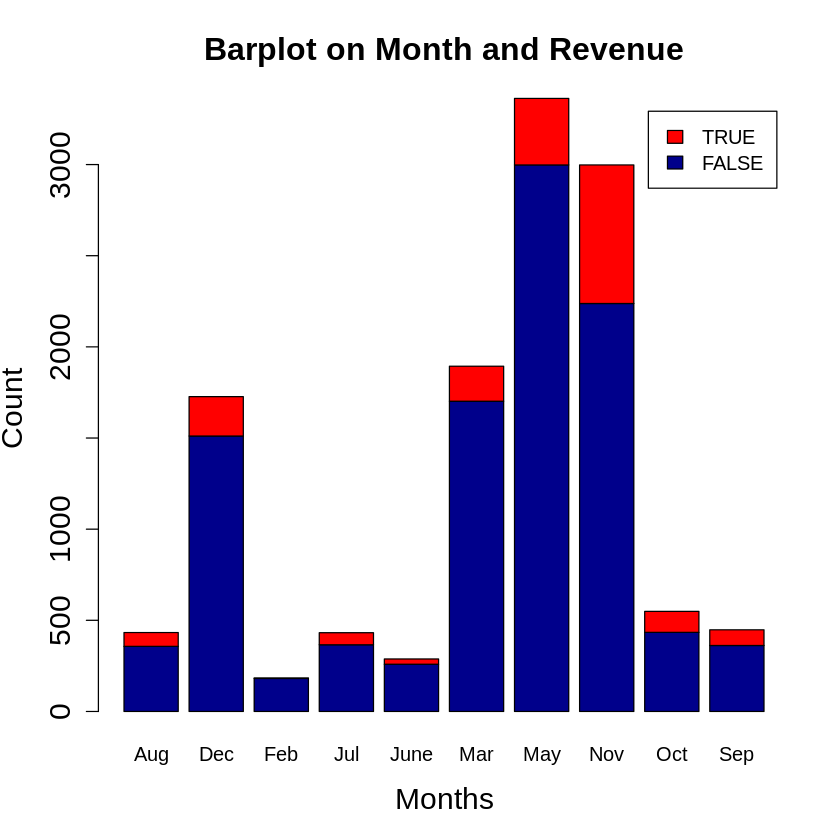

In [ ]:
# Stacked Bar Plot on months and revenue
#

counts <- table(Brand$Revenue, Brand$Month)
barplot(counts, main="Barplot on Month and Revenue",
xlab="Months", ylab = 'Count', col=c("darkblue","red"),
cex.lab=1.5, cex.axis=1.5, cex.main=1.6, cex.sub=1.5,
legend = rownames(counts))

#5. Feature Engineering

In [ ]:
#One-hot encoding of categorical variables

install.packages('dummies')
library(dummies)
Brand <- dummy.data.frame(Brand, names=c("Month","VisitorType","Weekend","Revenue"), sep="_")
head(Brand)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,1,1,1,0,0,1,1,0,1,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,2,1,2,0,0,1,1,0,1,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,1,9,3,0,0,1,1,0,1,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,2,2,4,0,0,1,1,0,1,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,3,1,4,0,0,1,0,1,1,0
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,2,1,3,0,0,1,1,0,1,0


#6. Implementing the solution - Unsupervised Learning Algorithms

##6.1 K-Means Clustering

In [ ]:
#Selection of attributes and label
#
#Attributes
Brand_attributes <- Brand[, c(1:29)]
head(Brand_attributes)

#Label
Brand_label<- Brand[,31]
head(Brand_label)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month_Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,0,1,1,1,1,0,0,1,1,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,0,2,2,1,2,0,0,1,1,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,0,4,1,9,3,0,0,1,1,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,0,3,2,2,4,0,0,1,1,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,0,3,3,1,4,0,0,1,0,1
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,0,2,2,1,3,0,0,1,1,0


[1] 0 0 0 0 0 0

In [ ]:
#Normalizing our attributes data
#

normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

Brand_attributes <- normalize(Brand_attributes)
head(Brand_attributes)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month_Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,1.875747e-05,1.875747e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,3.126245e-05,3.126245e-05,3.126245e-05,3.126245e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
2,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,4.689367e-05,1.016029e-03,1.563122e-05,1.719434e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,3.126245e-05,4.689367e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
3,1.563122e-05,0.000000e+00,1.563122e-05,0.000000e+00,3.126245e-05,0.000000e+00,1.875747e-05,1.875747e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,7.815611e-05,3.126245e-05,1.563122e-04,6.252489e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
4,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,4.689367e-05,5.731448e-05,1.641278e-05,1.781959e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,6.252489e-05,4.689367e-05,4.689367e-05,7.815611e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
5,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,1.719434e-04,9.824223e-03,1.594385e-05,1.641278e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,6.252489e-05,6.252489e-05,3.126245e-05,7.815611e-05,1.563122e-05,1.563122e-05,3.126245e-05,1.563122e-05,3.126245e-05
6,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,3.126245e-04,2.426226e-03,1.587803e-05,1.601515e-05,1.563122e-05,1.563122e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,3.126245e-05,6.252489e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05


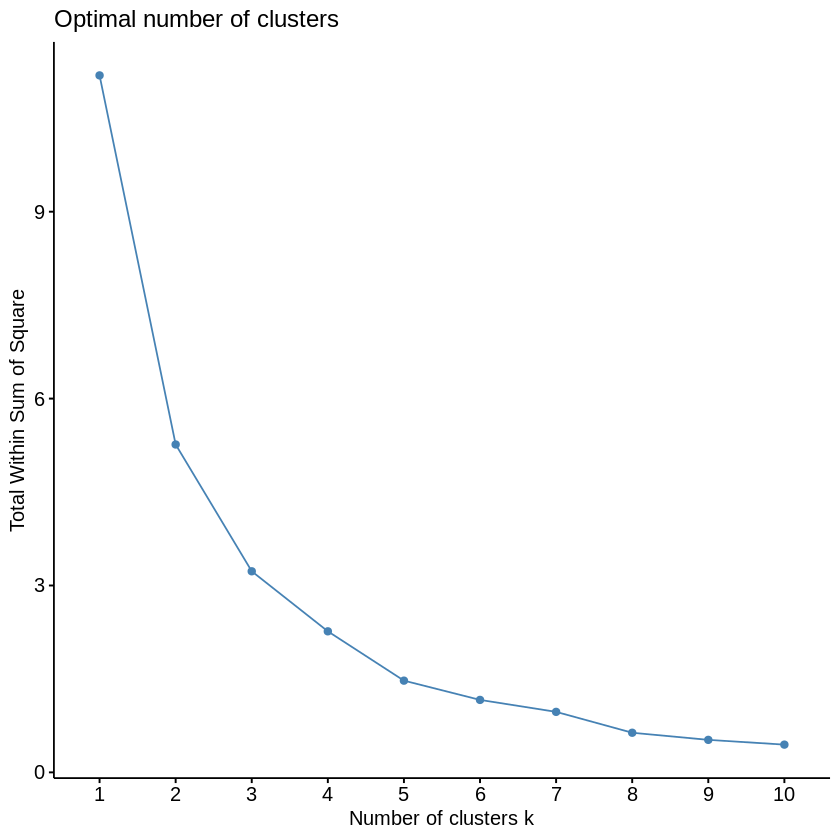

In [ ]:
#Selecting the best value for K
# Determining Optimal clusters (k) Using Elbow method

fviz_nbclust(x = Brand_attributes,FUNcluster = kmeans, method = 'wss' )

#The optimal number of k is 4

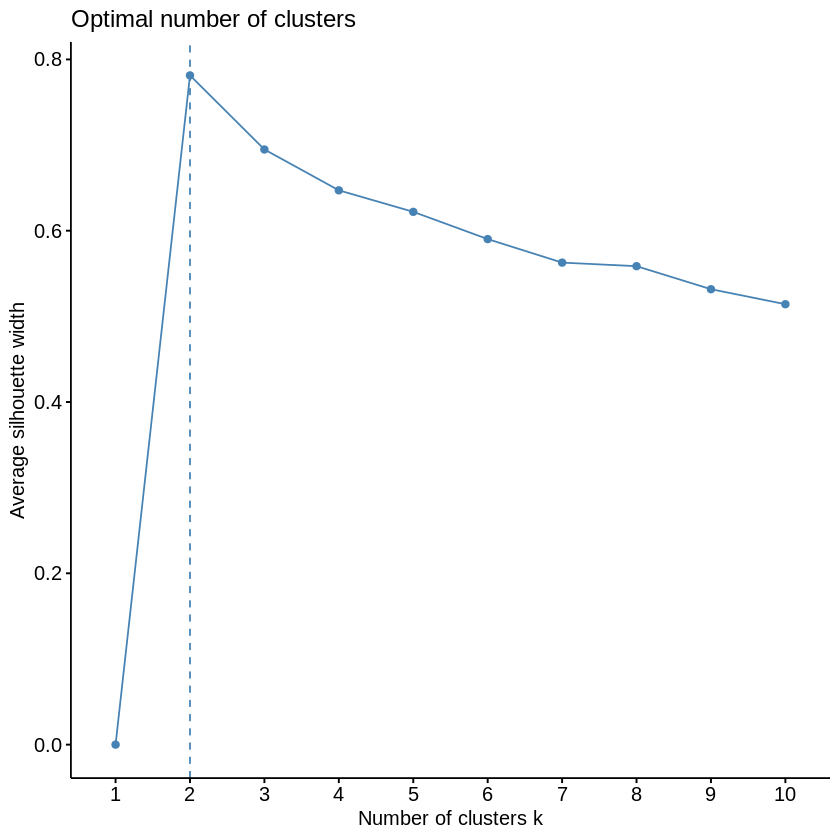

In [ ]:
# Determining Optimal clusters (k) Using Average Silhouette Method

fviz_nbclust(x = Brand_attributes,FUNcluster = kmeans, method = 'silhouette' )

#This method gives the best value of K as 2

In [ ]:
#Computation of k-means clustering using optimal value of 4

set.seed(123)

Brand_K4 <- kmeans(Brand_attributes, centers = 4, nstart = 25)
print(Brand_K4)

K-means clustering with 4 clusters of sizes 9071, 2608, 66, 571

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1   4.128118e-05             0.000855508  1.995131e-05           0.0002615857
2   7.432622e-05             0.002177811  3.032745e-05           0.0010660349
3   1.352338e-04             0.006525709  6.844581e-05           0.0057173013
4   1.076939e-04             0.003322866  4.369077e-05           0.0022855977
  ProductRelated ProductRelated_Duration  BounceRates    ExitRates   PageValues
1   0.0002626807             0.007068976 1.605835e-05 1.641740e-05 9.499934e-05
2   0.0009058497             0.036472270 1.575626e-05 1.599197e-05 1.495007e-04
3   0.0052104075             0.246558988 1.571601e-05 1.592271e-05 7.984826e-05
4   0.0021337851             0.096201929 1.573371e-05 1.595894e-05 1.237503e-04
    SpecialDay    Month_Aug    Month_Dec    Month_Feb    Month_Jul   Month_June
1 1.663964e-05 1.617748e-05 1.788173e-05 1.592417e

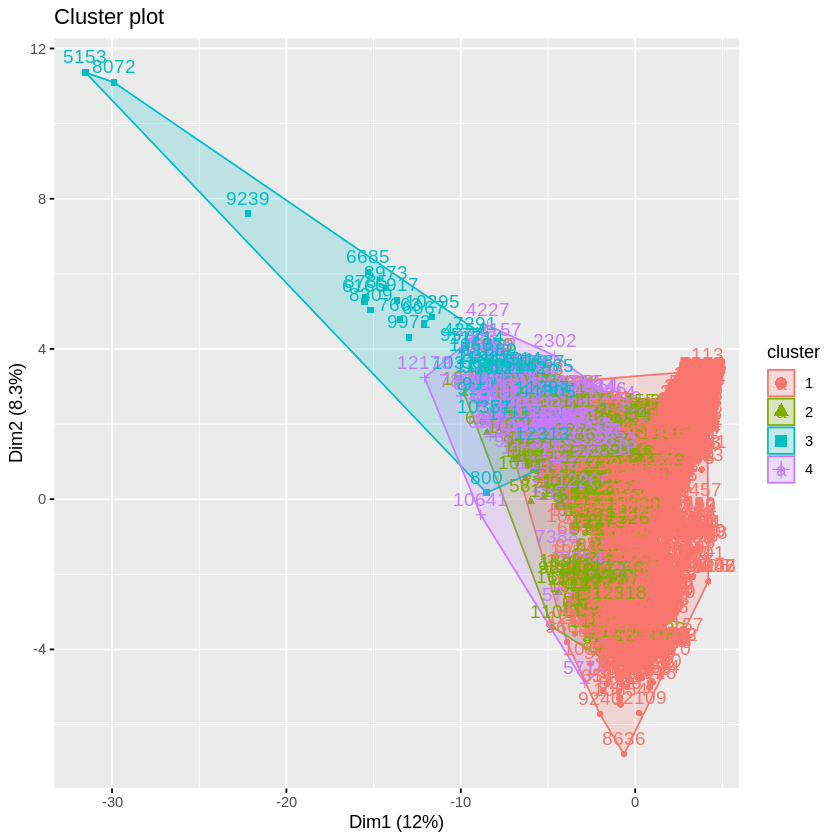

In [ ]:
#Visualizing data results
#

fviz_cluster(Brand_K4, data = Brand_attributes)

In [ ]:
# Clusters to which each point is associated

Brand_K4$cluster

In [ ]:
# Cluster centers

Brand_K4$centers

In [ ]:
# Cluster size
Brand_K4$size


[1] 9071 2608   66  571

In [ ]:
# Between clusters sum of square

Brand_K4$betweenss

[1] 8.924123

In [ ]:
# Within cluster sum of square

Brand_K4$withinss

[1] 0.389814 0.414858 1.061706 0.397810

In [ ]:
# Total with sum of square

Brand_K4$tot.withinss

[1] 2.264188

In [ ]:
#Total sum of square

Brand_K4$totss

[1] 11.18831

In [ ]:
#Descriptive statistics at the cluster level

Brand_attributes %>% 
  mutate(Cluster = Brand_K4$cluster) %>%
  group_by(Cluster) %>%
  summarize_all('median')

Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,⋯,Month_Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.563122e-05,1.563122e-05,1.563122e-05,1.563122e-05,0.0002032059,0.005450086,1.563122e-05,1.610016e-05,1.563122e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,6.252489e-05,6.252489e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
2,6.252489e-05,9.977930e-04,1.563122e-05,1.563122e-05,0.0007971924,0.033304952,1.570227e-05,1.593450e-05,1.563122e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,6.252489e-05,4.689367e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
3,1.250498e-04,2.734331e-03,5.470928e-05,1.796027e-03,0.0051426722,0.204334894,1.569795e-05,1.590855e-05,2.686192e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,3.126245e-05,4.689367e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05
4,9.378734e-05,1.830416e-03,3.126245e-05,2.930854e-04,0.0020320589,0.087817655,1.569681e-05,1.592149e-05,2.752778e-05,⋯,1.563122e-05,4.689367e-05,4.689367e-05,4.689367e-05,4.689367e-05,1.563122e-05,1.563122e-05,3.126245e-05,3.126245e-05,1.563122e-05


In [ ]:
#Creating K-means with 2, 3 and 5 values of K for comparison purposes
#

Brand_K2 <- kmeans(Brand_attributes, centers = 2, nstart = 25)
Brand_K3 <- kmeans(Brand_attributes, centers = 3, nstart = 25)
Brand_K5 <- kmeans(Brand_attributes, centers = 5, nstart = 25)

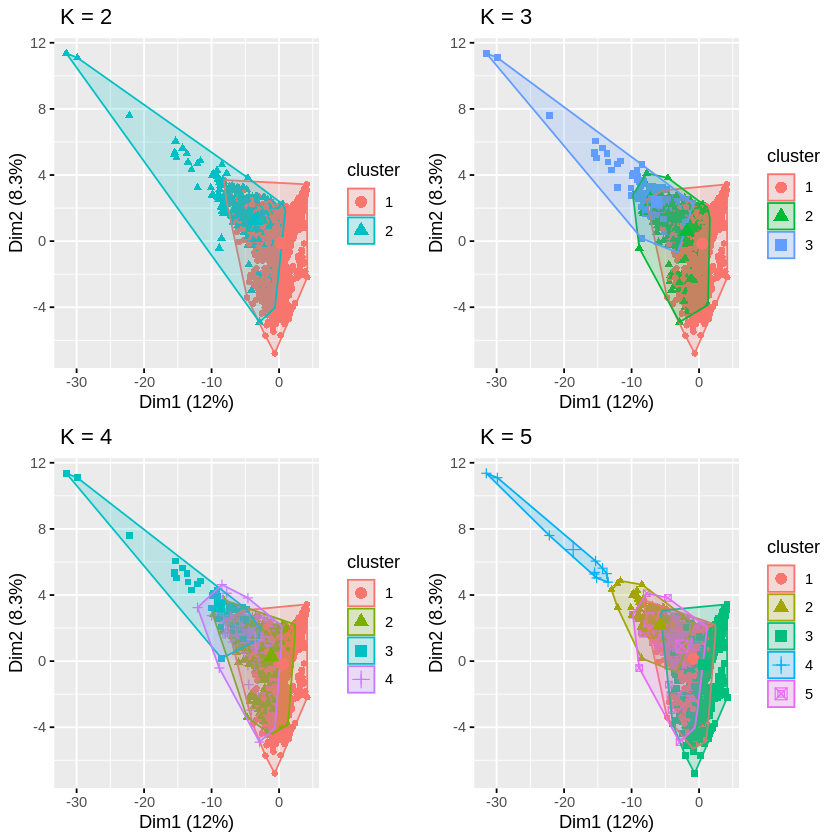

In [ ]:
#Visualizing the results from values of k of 2,3,4 and 5
#

install.packages('gridExtra')
library(gridExtra)

install.packages('ggplot2')
library(ggplot2)

p1 <- fviz_cluster(Brand_K2, geom = "point", data = Brand_attributes) + ggtitle(" K = 2")
p2 <- fviz_cluster(Brand_K3, geom = "point", data = Brand_attributes) + ggtitle(" K = 3")
p3 <- fviz_cluster(Brand_K4, geom = "point", data = Brand_attributes) + ggtitle(" K = 4")
p4 <- fviz_cluster(Brand_K5, geom = "point", data = Brand_attributes) + ggtitle(" K = 5")

grid.arrange(p1, p2, p3, p4, nrow = 2)

#We witness a better visualization at K=4

While using the K-means method, the optimal values of K obtained using the elbow method is 4 and silhouette Method is 2. However from visualisation at different values of K the best K value is 4.  

##6.1 Hierarchical Clustering

In [ ]:
#Displaying our data
#

head(Brand)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,1,1,1,0,0,1,1,0,1,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,2,1,2,0,0,1,1,0,1,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,1,9,3,0,0,1,1,0,1,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,2,2,4,0,0,1,1,0,1,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,3,1,4,0,0,1,0,1,1,0
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,2,1,3,0,0,1,1,0,1,0


In [ ]:
#Scaling of the data using the R function scale()
# 

Brand <- scale(Brand)
head(Brand)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
1,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,-0.8941841,-0.76292777,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
2,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.51445574,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
3,-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,2.4360812,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
4,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,⋯,-0.2081361,-0.4779009,-0.01751167,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
5,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,⋯,0.3739266,-0.8941841,-0.01751167,-0.3993337,-0.0833606,0.410877,-1.8161802,1.8161802,0.4281421,-0.4281421
6,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


In [ ]:
# We now use the R function hclust() for hierarchical clustering
#
# First we use the dist() function to compute the Euclidean distance between observations, 

d <- dist(Brand, method = "euclidean")

In [ ]:
# We then hierarchical clustering using the Ward's method
# 

res.hc <- hclust(d, method = "ward.D2" )
res.hc



Call:
hclust(d = d, method = "ward.D2")

Cluster method   : ward.D2 
Distance         : euclidean 
Number of objects: 12316 


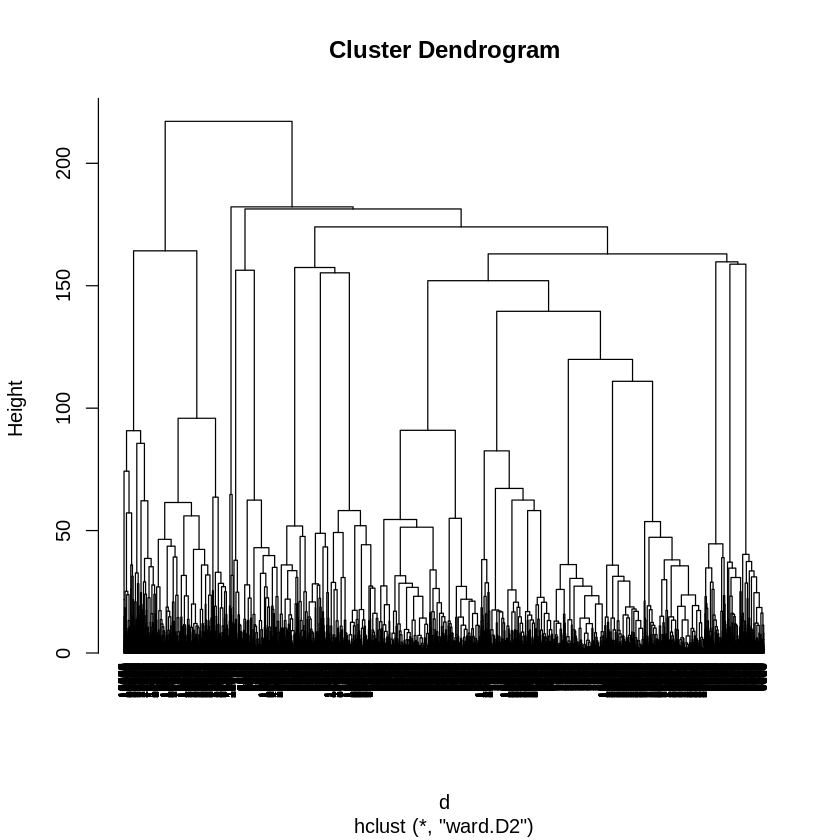

In [ ]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -10)


## Conclusion on K-means and Hierarchical methods

While using the K-means method, the optimal values of K obtained using the elbow method is 4 and silhouette Method is 2. However from visualisation at different values of K the best K value is 4.


One of the things we notice is that for K-means it is not easy to predict the value of K and the method does not work well with global cluster. On the other hand we notice that  hierarchical clustering can be expensive and slow for very large datasets as seen above such that it is not even easy to visualize the dendogram.


In terms of our set objective, we were able to apply unsupervised learning techniques to our dataset to be able to learn the characteristic of customer groups for this brand.

#7. Challenging the solution

The research was a success as we could be able to perform Exploratory Data Analysis and draw great insights from it all in a bid to identify customer characteristics. However the results could be improved if we had worked with variables that directly helped us determine these charasteristics.


Otherwise we can note the below:

1.The data we used for our research was appropriate to achieve the results.

2.The reaserch was a success as we were able to perform Exploratory data analysis and draw meaningful insights from it as well as apply unsupervised learning techniques to identify customer characterstics.

#8. Follow up questions

**1.Did we have the right data?**

Yes we had appropriate data to attain our reserch objective.

**2.Did we need additional data?**

No, the data we had was adequate.

**3.Did we attain our set objective?**

Yes, our research was a success as we were able to apply unsupervised learning techniques to attain our research objective. 
